In [2]:
import numpy as np 
import pandas as pd 


In [3]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [4]:
print("shape of data:",df.shape)
df.head()

shape of data: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
# import tensorflow as tf

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [39]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/envs/llm/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7620 - loss: 0.5475 - val_accuracy: 0.8037 - val_loss: 0.4859
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8004 - loss: 0.4805 - val_accuracy: 0.8106 - val_loss: 0.4553
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7987 - loss: 0.4567 - val_accuracy: 0.8188 - val_loss: 0.4350
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8085 - loss: 0.4394 - val_accuracy: 0.8194 - val_loss: 0.4226
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8290 - loss: 0.4109 - val_accuracy: 0.8238 - val_loss: 0.4140
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8270 - loss: 0.4082 - val_accuracy: 0.8281 - val_loss: 0.4084
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8234 - loss: 0.4103 - val_accuracy: 0.8275 - val_loss: 0.4031
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.3927 - val_accu

In [46]:
aq = model.layers[1].get_weights()
aq

[array([[ 0.24835752, -0.08278965,  0.13699901,  0.407705  ,  0.01919804,
          0.07629835,  0.13324119,  0.51782787,  0.6714863 ,  0.14121738,
         -0.10759789],
        [ 0.2066778 , -0.17528348, -0.2317798 , -0.0121099 ,  0.01364491,
         -0.06282006, -0.62593174, -0.6620366 , -0.0627543 , -0.14179939,
          0.08504235],
        [ 0.16812351,  0.60935503,  0.51409703, -0.26653385, -0.49869108,
          0.7866551 , -0.33025396,  0.17518853,  0.53583974, -0.23431505,
         -0.16541994],
        [ 0.2478284 ,  0.66478384, -0.5511599 , -0.23380026,  0.26152122,
          0.37835208,  0.1030686 , -0.22756119, -0.35430014,  0.1873462 ,
         -0.06490167],
        [ 0.5081396 ,  0.5974923 ,  0.39350292,  0.42956895,  0.59335923,
          0.2761446 ,  0.39118004,  0.4196232 ,  0.22778875,  0.02637834,
          0.1819437 ],
        [ 0.11764777,  0.07148691,  0.7320689 , -0.06706432, -0.2790395 ,
         -0.5284998 , -0.19165087,  0.24454194, -0.20635091, -0.2369310

In [47]:
aq[1].shape

(11,)

In [33]:
y_log = model.predict(X_test_trf)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.33027783],
       [0.33047125],
       [0.1690754 ],
       ...,
       [0.15568593],
       [0.1162584 ],
       [0.23225069]], dtype=float32)

In [35]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
y_pred = y_pred.argmax(axis=-1)# argmax() finds the index of the maximum value along a specified axis


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

Text(0.5, 1.0, 'loss vs val_loss')

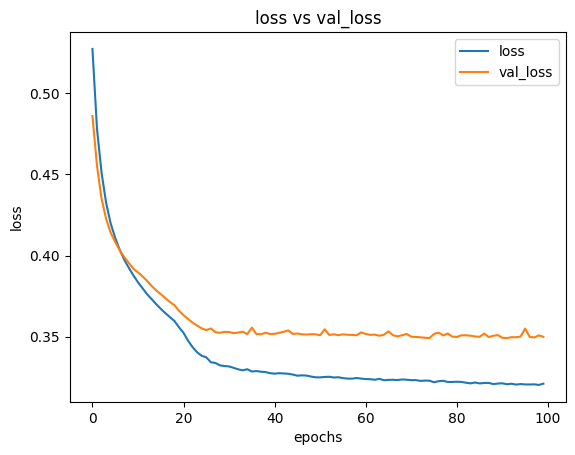

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.title('loss vs val_loss')

Text(0.5, 1.0, 'accuracy vs val_accuracy')

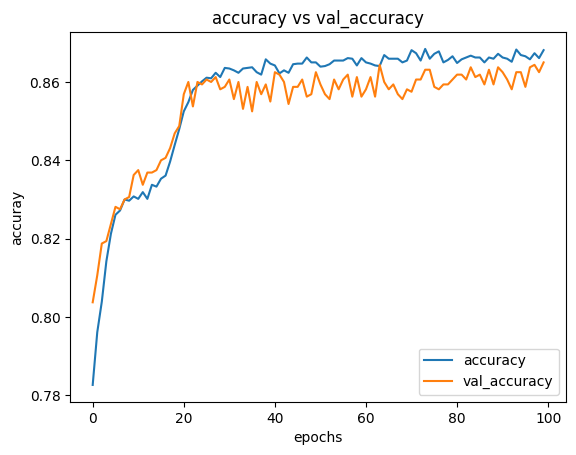

In [50]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuray')
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy vs val_accuracy')